In [1]:
# search tweets example 1.ipynb
import keys, tweepy
auth = tweepy.OAuthHandler(keys.consumer_key,keys.consumer_key_secret)
auth.set_access_token(keys.access_token,keys.access_token_secret)

# We use the api object to call/use twitter api methods/functions
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [2]:
# Don't include retweets by adding '-filter:retweets' to the search query
query = '("budget 2020" OR "budget 2021") -rte -filter:retweets since:2020-10-13'

# Search for tweets with the words in the query
# By default the twiiter api search method returns 15 tweets
# Max value of count is 100
# We can make 450 calls to the twwiter search method in a 15 min window
# and each time get get a max of 100 tweets.
# Meaning we can get 100 (max tweets) x 450 (requests) tweets in 15 mins -> 45,000

# Max number of twwets in a an hour? 100 * 450 * 4 = 180,000
# NOTE: To get tweets over 140 charaters we need to use extended mode
tweets = api.search(q=query, count=100, tweet_mode="extended", lang="en")

### Twitter API search info:
https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/api-reference/get-search-tweets

### Standard search operator
https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/guides/standard-operators

In [3]:
len(tweets)

100

In [4]:
type(tweets)

tweepy.models.SearchResults

In [5]:
type(tweets[0])

tweepy.models.Status

In [6]:
# The _json object is a dictionary that tweepy has created 
# from the json encoding string returned by the api call
# tweets[0]._json

In [7]:
# Import and create a factory Blobber
from textblob import Blobber
my_blobber = Blobber() # It will use the default sentiment analysis from texblob

In [8]:
# Iterate through the tweets inside the SearchResults
tweet_counter = 1

# Empty list to hold the text of the tweets
tweets_text= []

# Second way using list comp - Warning this might fail
tweets_text2 = [tweet.full_text for tweet in tweets]

for tweet in tweets:
    # If the tweet is an exendd tweet it will have a full_text property/key
    try:
        text = tweet.full_text
    except:
        # If not an extended twwet then it just have a text property/key
        text = tweet.text
        
    print(f"TWEET NUMBER: {tweet_counter}")
    # Show the tweet user name and screen name
    print(f"Name: {tweet.user.name}, Screen Name: {tweet.user.screen_name}")
    # Show the date of my tweet
    print(f"Created date: {tweet.created_at}")
    # Show the actual tweet text
    print(f"Tweet: {text}")
    print(f"{my_blobber(text).sentiment}\n")
    tweet_counter +=1
    
    # Append the tweet text ot the list
    tweets_text.append([tweet.user.name,text,my_blobber(text).sentiment.polarity,my_blobber(text).sentiment.subjectivity])

TWEET NUMBER: 1
Name: Ecovis DCA, Screen Name: EcovisDCA
Created date: 2020-10-14 10:34:27
Tweet: Budget 2021 - The Key Points

https://t.co/clUBuxNKA8
Sentiment(polarity=0.0, subjectivity=1.0)

TWEET NUMBER: 2
Name: 96fm Opinion Line, Screen Name: OpinionLine96
Created date: 2020-10-14 10:33:28
Tweet: BUDGET 2021: Now speaking to Minister Michael McGrath about the budget measures @mmcgrathtd
Sentiment(polarity=0.0, subjectivity=0.0)

TWEET NUMBER: 3
Name: KilkennyNow.ie, Screen Name: KilkennyNow_
Created date: 2020-10-14 10:32:10
Tweet: Childcare left behind in €17.75bn Budget – Kilkenny TD https://t.co/7zzNeJ48cd
Sentiment(polarity=-0.2, subjectivity=0.35)

TWEET NUMBER: 4
Name: ISME, Screen Name: isme_ie
Created date: 2020-10-14 10:31:16
Tweet: Budget 2021: What Does It Mean For You? https://t.co/crDPqzQj9t via @todayfm
Sentiment(polarity=-0.3125, subjectivity=0.6875)

TWEET NUMBER: 5
Name: Silicon Republic, Screen Name: siliconrepublic
Created date: 2020-10-14 10:30:00
Tweet: Misse

In [9]:
# tweets[4]._json

In [10]:
# Add sentiment analsysis to the loop that print out the tweets

# Review this article:
# https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/

# Experiment with searching for different tweets and using the "Standard search operators"
# https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/guides/standard-operators

# Collect a number of tweets and create a Pandas df containing the text of those tweets
# https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/

In [11]:
# tweets_text

In [12]:
# Pandas
import pandas as pd
df = pd.DataFrame(tweets_text,columns=["Name","Tweet Text","Sentiment Polarity", "Sentiment Subjectivity"])
# Set the df to show up to 280 characters
pd.set_option('display.max_colwidth', 280)
df

,Name,Tweet Text,Sentiment Polarity,Sentiment Subjectivity
0,Ecovis DCA,Budget 2021 - The Key Points\n\nhttps://t.co/clUBuxNKA8,0.000000,1.000000
1,96fm Opinion Line,BUDGET 2021: Now speaking to Minister Michael McGrath about the budget measures @mmcgrathtd,0.000000,0.000000
2,KilkennyNow.ie,Childcare left behind in €17.75bn Budget – Kilkenny TD https://t.co/7zzNeJ48cd,-0.200000,0.350000
3,ISME,Budget 2021: What Does It Mean For You? https://t.co/crDPqzQj9t via @todayfm,-0.312500,0.687500
4,Silicon Republic,"Missed #Budget2021? Here’s what it means for jobs, wage supports, taxes and more https://t.co/eejw1cHkDh",0.500000,0.500000
...,...,...,...,...
95,Glenn Jones,"Budget unanimity – a spending feast of least resistance, devoid of ideas and vision – and little ingenuity https://t.co/M6dBb8gUnM via @MichaelWestBiz",-0.195833,0.366667
96,Small Firms Association,SFA National Council member Carol Ann Casey giving her thoughts on #Budget2021 \nBudget 2021: 'Do I need to be in Dublin city anymore?' self-employed businesswoman on working from home https://t.co/CxoNfDDEuh,0.000000,0.000000
97,karen keeley,"@coxymallon @UlsterBank @RBKCA \nThanks for an interesting morning, a good summary of what budget 2021 delivers for us personally and for the Irish economy #Budget2021 #helpforwhatmatters https://t.co/7rVORmCAVj",0.280000,0.320000
98,Irish Times Business,LIVE Q&amp;A: Not sure what Budget 2021 means for you? There's still time to ask our experts \nhttps://t.co/RZoLKR6L0R,-0.056818,0.694444


In [13]:
from textblob import TextBlob
TextBlob("Budget 2021: Reaction to 'unprecedented' €18bn package https://t.co/L2nwyBuN6p").sentiment

Sentiment(polarity=0.6, subjectivity=0.9)

In [14]:
from textblob import TextBlob
TextBlob("Budget 2021.... I think every year what about the poor working man?").sentiment

Sentiment(polarity=-0.4, subjectivity=0.6)

In [15]:
# Experimental!!!

# Adjusting these values affects the sentiment rating function
postive_threshold = 0.4
negative_threshold = -0.4

# Function to return overall rating of whether the polarity is considered
# Positive, Neutral, Negative
def sentiment_rater(num):
    '''
    Function to return overall rating of whether the polarity is 
    considered: Positive, Neutral, Negative
    '''
    if num >= postive_threshold:
        return "Positive"
    elif num < postive_threshold and num >= negative_threshold:
        return "Neutral"
    else:
        return "Negative"

In [16]:
# df["Overall Sentiment"] = df["Sentiment Polarity"]
# df = df.assign(Sentiment=df["Sentiment Polarity"].apply(sentiment_rater))

# Create a new column and assign it a value based on applying the sentiment_rater function
# to each value in df["Sentiment Polarity"] column
df["TextBlob Overall Semtiment"] = df["Sentiment Polarity"].apply(sentiment_rater)


df.sort_values(by="TextBlob Overall Semtiment",ascending=False,inplace=True)

df

,Name,Tweet Text,Sentiment Polarity,Sentiment Subjectivity,TextBlob Overall Semtiment
76,DLR PPN,"Ministers Heather Humphreys T.D. &amp; Joe O’Brien T.D., welcome the 341 million euro to the Department of Rural and Community Development as part of Budget 2021.\n\n@DeptRCD \nhttps://t.co/BFZbxEmMp5",0.400000,0.450000,Positive
44,The Morning Show says #StayLocal,ICare Housing has given housing measures in yesterday's Budget a cautious welcome.\n\nSo what are the measures to help housing in Budget 2021? \n\nDavid Harvey speaks to David Hall from @icarehousing,0.800000,0.900000,Positive
27,Irish Pharmacy Union,.@IrishPharmacy has welcomed the increase in healthcare spending but said it must be delivered in communities as well as hospitals.\n\n#ThinkPharmacy\n\nRead more at https://t.co/Av2RU2zInv https://t.co/RmDe0af0Oo,0.500000,0.500000,Positive
71,dcuncfb,Missed Budget 2021 yesterday? A brilliant summary of the announcements from our partners @PwCIreland. Check it out! #Budget2021 #SME #familybusiness \n\nhttps://t.co/T6enM6AdZt,1.000000,1.000000,Positive
66,Gerard O'Donovan,Great analysis and insights @KPMG_Ireland Budget 2021 Webinar by @danobrien20 and @cooper_m https://t.co/ic3tFgwe0y,0.800000,0.750000,Positive
...,...,...,...,...,...
31,AgriLand,€221 million in funding has been announced for residential and community retrofit schemes https://t.co/VKI65drpi1,0.000000,0.000000,Neutral
30,sumay,"Now is the time to have your say! As a Malaysian, what is important to you? How can we ensure that no one is left behind when it comes to Budget 2021? If you believe that you can make a difference, stand up and be counted. #RakyatJagaRakyat\n\nhttps://t.co/1uRynYjXiD",0.000000,0.566667,Neutral
29,The Wheel,Our initial reaction to #Budget2021 in the Irish Times today. Our full analysis will be shared at our post-Budget briefing on Friday. https://t.co/dQ6BtGHqk5 #FundCommunity @DeirdreGarvey @ElusiveDame @Carmichael_IRL @lizhughes2018 @Dochasnetwork @voluntireland,0.116667,0.183333,Neutral
99,JaylonLee™,Am I still crazy for saying this Pandemic is a plot to rollout a long list of agendas??? 🤔\n\nPolice State \nVaccines \nEconomic \nCollapse Cashless Society\n\nAustralians face TWO YEARS of social distancing - and no overseas trips until EVERYONE is vaccinated https://t.co/...,-0.104167,0.391667,Neutral


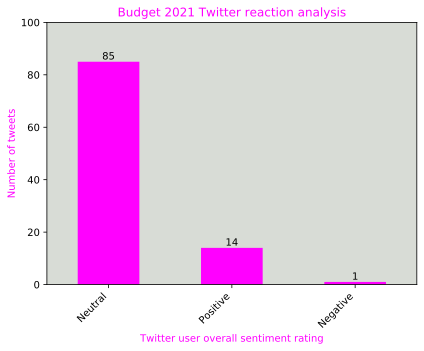

In [46]:
# Using my code in this file: 'search tweets example 1.ipynb'
# A Bar chart to show the number of positive, negative and neutral tweets
# Which will serve as a gauge to rate the reaction to the the budget.
# Use SVG graphics, add title, labels etc...

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

# Get a series of the unique values and counts in the "TextBlob Overall Semtiment" column
# of the data frame.
sentiment_counts = df["TextBlob Overall Semtiment"].value_counts()

# A pandas series has plotting functions....
# The series.plot.bar() method returns a reference to an axes object 
axes = sentiment_counts.plot.bar(color="magenta", figsize=(6,5))

# matplotlib.axes documentation
# https://matplotlib.org/3.1.1/api/axes_api.html
axes.set_xlabel("Twitter user overall sentiment rating",color="Magenta")
axes.set_ylabel("Number of tweets",color="Magenta")
axes.set_title("Budget 2021 Twitter reaction analysis", color="Magenta")
# https://xkcd.com/color/rgb/
axes.set_facecolor("xkcd:light grey")

# Set the upper/top y limit to the total number of tweets/sentiments analysed
axes.set_ylim(top=sentiment_counts.sum())

# Annotate the bars/patches with the value of the height of each bar
for p in axes.patches:
    axes.annotate(format(p.get_height(), 'd'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')

plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

In [27]:
# value_counts() returns a series with the unique items and their counts
sentiments = df["TextBlob Overall Semtiment"].value_counts()
sentiments

Neutral     85
Positive    14
Negative     1
Name: TextBlob Overall Semtiment, dtype: int64

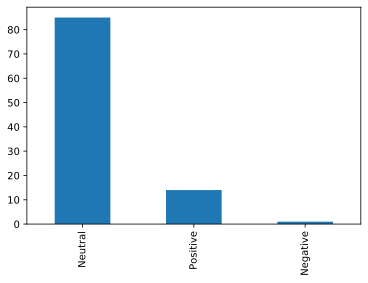

In [29]:
axes = sentiments.plot.bar()
plt.show()